## Assignment 6 
- Joel Oliveira - 59442
- João Braz - 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('d:/universidade/mestrado/Semestre2/DeepLearning/AdvancedMachineLearning/TP/TP6/flower_photos', origin=dataset_url)
data_dir = pathlib.Path(data_dir)

In [3]:
data_dir

WindowsPath('d:/universidade/mestrado/Semestre2/DeepLearning/AdvancedMachineLearning/TP/TP6/flower_photos')

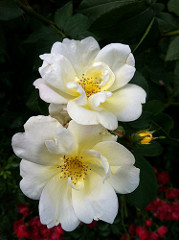

In [4]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

In [14]:
def get_dataset(img_width=180, img_height=180, batch_size=32):
    train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
        data_dir,
        validation_split=0.2,
        subset="both",
        seed=123,
        image_size=(img_height, img_width),
        #batch_size=batch_size
    )

    AUTOTUNE = tf.data.AUTOTUNE

    train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
    val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
    return train_ds, val_ds

In [15]:
train_ds, val_ds = get_dataset(batch_size=1)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Using 734 files for validation.


In [16]:
train_ds

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [7]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [9]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

### Problem 1
Create 4 different models, one at a time, by modifying the reference model in the following manner:

0. Using the reference model

In [10]:
num_classes = len(class_names)

model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])



In [11]:
model.compile(optimizer='adam',
          loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
          metrics=['accuracy']
)

In [12]:
epochs = 30
baseline_hist = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/30
92/92 [==============================] - 20s 47ms/step - loss: 1.2828 - accuracy: 0.4714 - val_loss: 1.1335 - val_accuracy: 0.5272
Epoch 2/30
92/92 [==============================] - 3s 30ms/step - loss: 1.0213 - accuracy: 0.6005 - val_loss: 0.9187 - val_accuracy: 0.6417
Epoch 3/30
92/92 [==============================] - 3s 31ms/step - loss: 0.9021 - accuracy: 0.6488 - val_loss: 0.9119 - val_accuracy: 0.6431
Epoch 4/30
92/92 [==============================] - 3s 31ms/step - loss: 0.8435 - accuracy: 0.6706 - val_loss: 0.8094 - val_accuracy: 0.6975
Epoch 5/30
92/92 [==============================] - 3s 30ms/step - loss: 0.7922 - accuracy: 0.6962 - val_loss: 0.8088 - val_accuracy: 0.6962
Epoch 6/30
92/92 [==============================] - 3s 30ms/step - loss: 0.7325 - accuracy: 0.7200 - val_loss: 0.7699 - val_accuracy: 0.7016
Epoch 7/30
92/92 [==============================] - 3s 31ms/step - loss: 0.7033 - accuracy: 0.7333 - val_loss: 0.7739 - val_accuracy: 0.6962
Epoch 8/30
9

Text(0.5, 1.0, 'Training and Validation Loss')

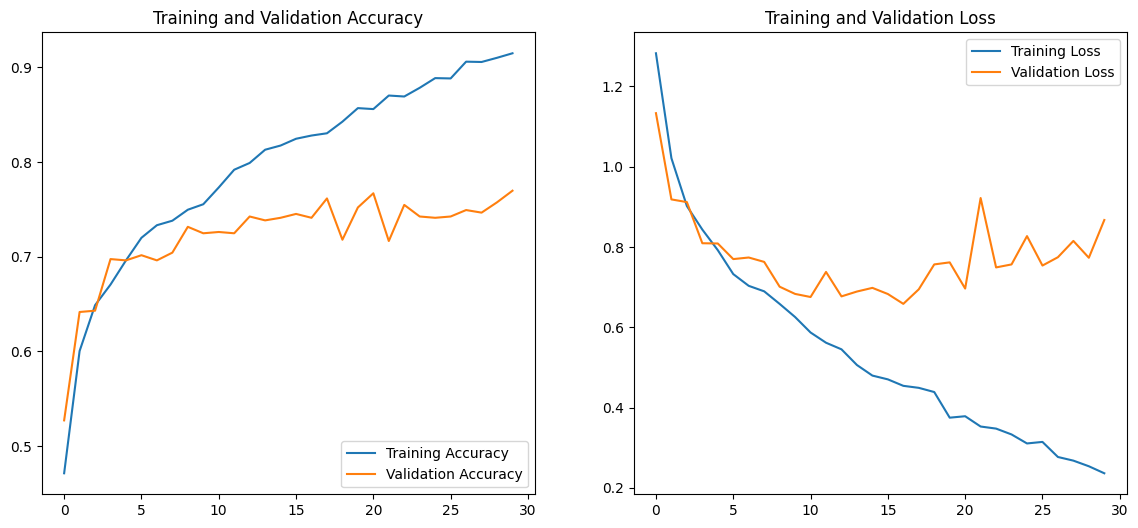

In [13]:
acc = baseline_hist.history['accuracy']
val_acc = baseline_hist.history['val_accuracy']

loss = baseline_hist.history['loss']
val_loss = baseline_hist.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

We can see that the accuracy evolves in a log-like trend. It seems to start over-fitting around epoch 10, since there is a big improvement in the training loss/accuracy values in the training set without a big change in the validation set

1. Using the mean squared error as loss function

In [14]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy']
)

In [16]:
epochs=30
hist_mse = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
)

Epoch 1/30
92/92 [==============================] - 6s 32ms/step - loss: 1.7208 - accuracy: 0.2088 - val_loss: 1.3638 - val_accuracy: 0.2057
Epoch 2/30
92/92 [==============================] - 3s 30ms/step - loss: 1.3076 - accuracy: 0.1812 - val_loss: 1.1960 - val_accuracy: 0.2057
Epoch 3/30
92/92 [==============================] - 3s 30ms/step - loss: 1.2179 - accuracy: 0.1849 - val_loss: 1.1762 - val_accuracy: 0.1948
Epoch 4/30
92/92 [==============================] - 3s 31ms/step - loss: 1.1698 - accuracy: 0.1720 - val_loss: 1.0914 - val_accuracy: 0.2180
Epoch 5/30
92/92 [==============================] - 3s 30ms/step - loss: 1.1392 - accuracy: 0.1914 - val_loss: 1.1752 - val_accuracy: 0.1812
Epoch 6/30
92/92 [==============================] - 3s 30ms/step - loss: 1.0780 - accuracy: 0.1696 - val_loss: 1.0638 - val_accuracy: 0.1621
Epoch 7/30
92/92 [==============================] - 3s 32ms/step - loss: 1.0117 - accuracy: 0.1911 - val_loss: 1.1610 - val_accuracy: 0.1608
Epoch 8/30
92

Text(0.5, 1.0, 'Training and Validation Loss')

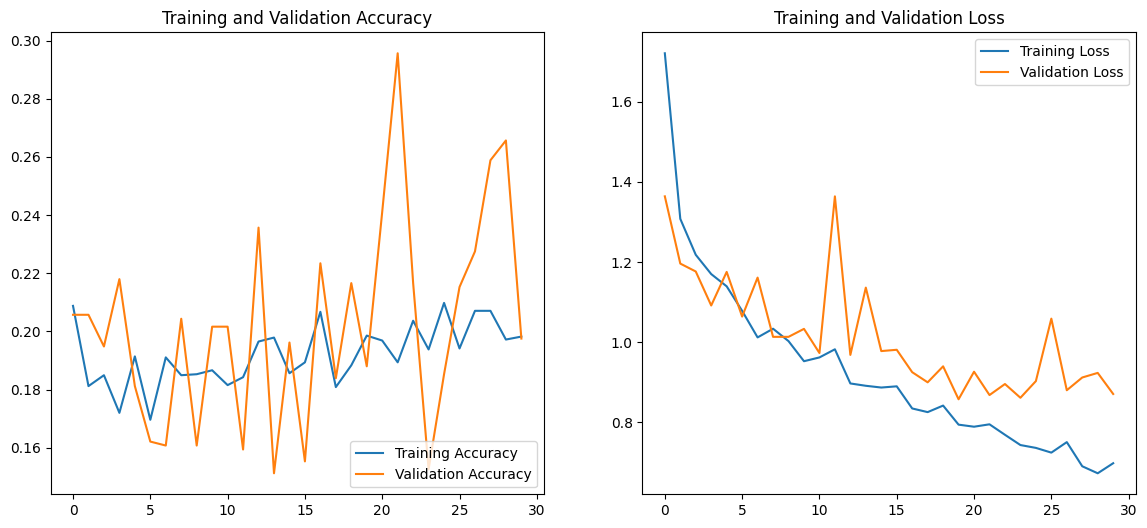

In [17]:
acc = hist_mse.history['accuracy']
val_acc = hist_mse.history['val_accuracy']

loss = hist_mse.history['loss']
val_loss = hist_mse.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

By looking to the historic of the training we can see that the accuracy values are no where near the previous model. Although the loss function does indeed decrease of time, this reduction is not reflected in the evaluation metric, since accuracy seems to have a random trend. This metric has a bad impact in the training of the model. <br>
It seems that there is overfitting from epoch 1.

2. Using Dropout probability of 40%

In [18]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.4),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
)

In [20]:
epochs = 30
hist_drop = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/30
92/92 [==============================] - 5s 33ms/step - loss: 1.2803 - accuracy: 0.4452 - val_loss: 1.1184 - val_accuracy: 0.5504
Epoch 2/30
92/92 [==============================] - 3s 32ms/step - loss: 1.0164 - accuracy: 0.6015 - val_loss: 1.0408 - val_accuracy: 0.5940
Epoch 3/30
92/92 [==============================] - 3s 31ms/step - loss: 0.9415 - accuracy: 0.6270 - val_loss: 0.8975 - val_accuracy: 0.6553
Epoch 4/30
92/92 [==============================] - 3s 31ms/step - loss: 0.8508 - accuracy: 0.6727 - val_loss: 0.9561 - val_accuracy: 0.6417
Epoch 5/30
92/92 [==============================] - 3s 31ms/step - loss: 0.8065 - accuracy: 0.6870 - val_loss: 0.7939 - val_accuracy: 0.6948
Epoch 6/30
92/92 [==============================] - 3s 33ms/step - loss: 0.7552 - accuracy: 0.7136 - val_loss: 0.7540 - val_accuracy: 0.7098
Epoch 7/30
92/92 [==============================] - 3s 30ms/step - loss: 0.7402 - accuracy: 0.7190 - val_loss: 0.7301 - val_accuracy: 0.7153
Epoch 8/30
92

Text(0.5, 1.0, 'Training and Validation Loss')

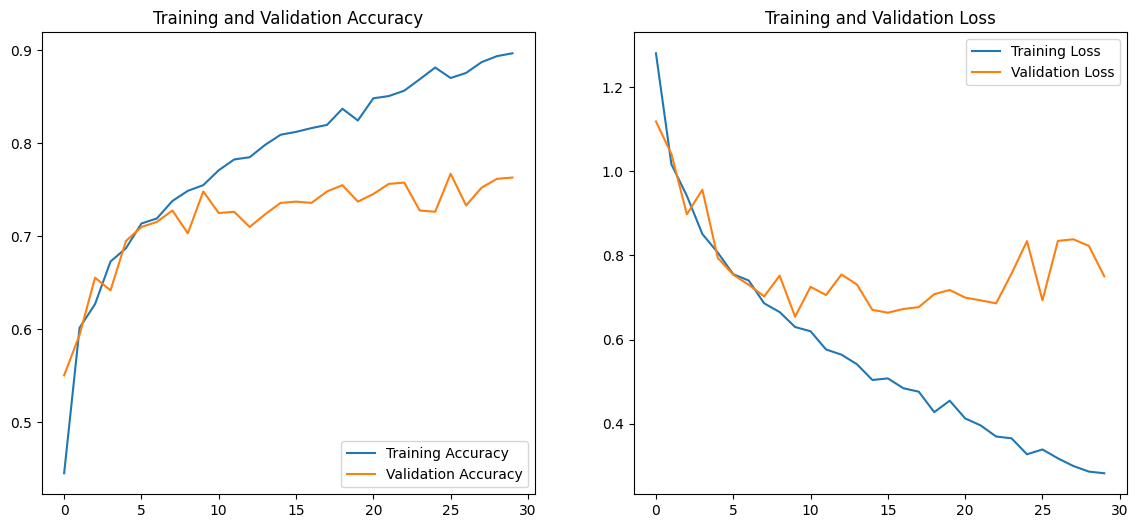

In [21]:
acc = hist_drop.history['accuracy']
val_acc = hist_drop.history['val_accuracy']

loss = hist_drop.history['loss']
val_loss = hist_drop.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

The results are very like the reference model. It seems that it reached the overfitting point around epoch 8. This model did not perform so well on the validation set. <br> 
Performance-wise, it seems to have the same time/step.

3. Using batch size of 8

In [42]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [43]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
)

In [44]:
train_ds, val_ds = get_dataset(batch_size=8)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Using 734 files for validation.


In [45]:
epochs = 30
hist_batch_size = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
)

Epoch 1/30
367/367 [==============================] - 12s 13ms/step - loss: 1.2488 - accuracy: 0.4591 - val_loss: 1.0478 - val_accuracy: 0.5804
Epoch 2/30
367/367 [==============================] - 4s 10ms/step - loss: 0.9920 - accuracy: 0.6134 - val_loss: 1.1092 - val_accuracy: 0.5886
Epoch 3/30
367/367 [==============================] - 4s 12ms/step - loss: 0.8848 - accuracy: 0.6519 - val_loss: 0.8697 - val_accuracy: 0.6635
Epoch 4/30
367/367 [==============================] - 4s 10ms/step - loss: 0.8288 - accuracy: 0.6764 - val_loss: 0.8532 - val_accuracy: 0.6703
Epoch 5/30
367/367 [==============================] - 4s 10ms/step - loss: 0.7805 - accuracy: 0.6938 - val_loss: 0.8596 - val_accuracy: 0.6608
Epoch 6/30
367/367 [==============================] - 4s 12ms/step - loss: 0.7538 - accuracy: 0.7146 - val_loss: 0.8360 - val_accuracy: 0.6826
Epoch 7/30
367/367 [==============================] - 4s 10ms/step - loss: 0.7237 - accuracy: 0.7159 - val_loss: 0.7522 - val_accuracy: 0.703

Text(0.5, 1.0, 'Training and Validation Loss')

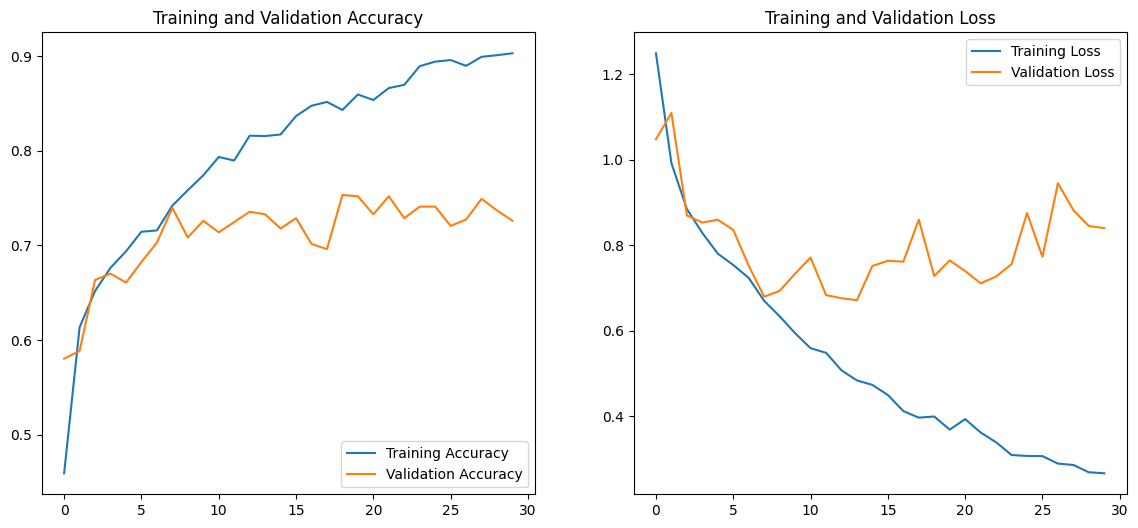

In [46]:
acc = hist_batch_size.history['accuracy']
val_acc = hist_batch_size.history['val_accuracy']

loss = hist_batch_size.history['loss']
val_loss = hist_batch_size.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

We can almost see a copy of the data from the *dropout 40%* model, although we can see that there is an earlier point of overfitting ( around epoch 7 ). <br>
What can be noticed is that the time/step was a lot faster reducing from 30ms to 10ms per step.

4. Using batch normalization

In [32]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.BatchNormalization(), 
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [33]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
)

In [ ]:
train_ds, val_ds = get_dataset()

In [34]:
epochs = 30
hist_batch_norm = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
)

Epoch 1/30
92/92 [==============================] - 7s 34ms/step - loss: 1.3322 - accuracy: 0.4717 - val_loss: 1.4903 - val_accuracy: 0.3406
Epoch 2/30
92/92 [==============================] - 3s 31ms/step - loss: 1.0707 - accuracy: 0.5708 - val_loss: 1.4823 - val_accuracy: 0.2834
Epoch 3/30
92/92 [==============================] - 3s 31ms/step - loss: 0.9961 - accuracy: 0.6165 - val_loss: 1.4480 - val_accuracy: 0.2807
Epoch 4/30
92/92 [==============================] - 3s 32ms/step - loss: 0.9319 - accuracy: 0.6396 - val_loss: 1.0882 - val_accuracy: 0.5845
Epoch 5/30
92/92 [==============================] - 3s 31ms/step - loss: 0.8640 - accuracy: 0.6683 - val_loss: 1.3710 - val_accuracy: 0.4128
Epoch 6/30
92/92 [==============================] - 3s 31ms/step - loss: 0.8217 - accuracy: 0.6866 - val_loss: 0.8523 - val_accuracy: 0.6798
Epoch 7/30
92/92 [==============================] - 3s 33ms/step - loss: 0.7812 - accuracy: 0.7033 - val_loss: 1.1791 - val_accuracy: 0.6063
Epoch 8/30
92

Text(0.5, 1.0, 'Training and Validation Loss')

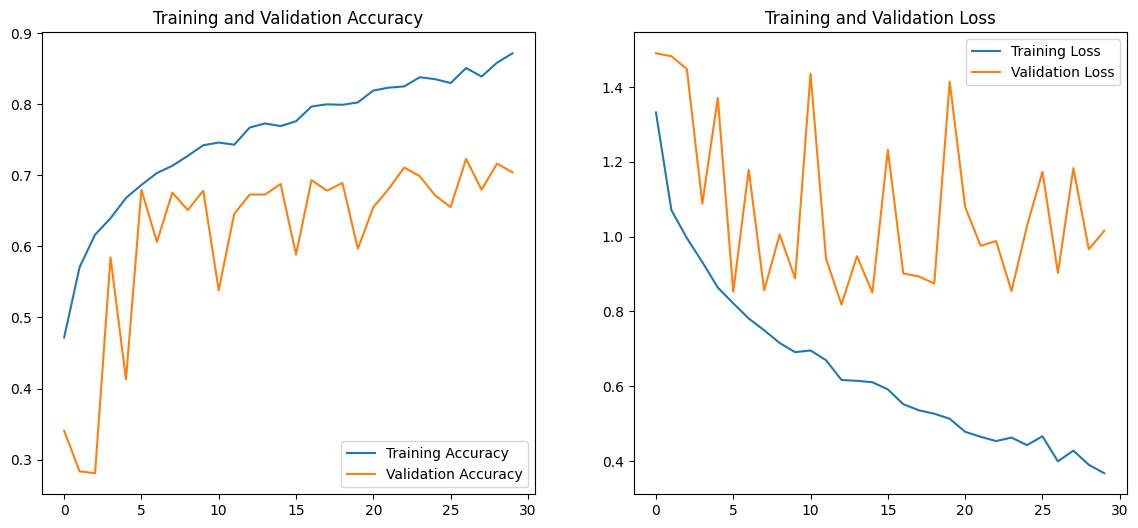

In [35]:
acc = hist_batch_norm.history['accuracy']
val_acc = hist_batch_norm.history['val_accuracy']

loss = hist_batch_norm.history['loss']
val_loss = hist_batch_norm.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

The metric results have a lot more variance than in the previous scenarios. Overfitting from epoch 6. <br>

5. Using all modifications except loss function

In [47]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.4),
    layers.BatchNormalization(),  
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [48]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'],
)

In [ ]:
train_ds, val_ds = get_dataset(batch_size=8)

In [49]:
epochs = 30
hist_all = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
)

Epoch 1/30
367/367 [==============================] - 7s 13ms/step - loss: 1.3491 - accuracy: 0.4537 - val_loss: 1.4310 - val_accuracy: 0.4196
Epoch 2/30
367/367 [==============================] - 4s 11ms/step - loss: 1.1570 - accuracy: 0.5320 - val_loss: 1.2232 - val_accuracy: 0.4946
Epoch 3/30
367/367 [==============================] - 4s 12ms/step - loss: 1.0539 - accuracy: 0.5777 - val_loss: 1.0448 - val_accuracy: 0.6199
Epoch 4/30
367/367 [==============================] - 4s 10ms/step - loss: 1.0066 - accuracy: 0.6049 - val_loss: 1.0505 - val_accuracy: 0.5736
Epoch 5/30
367/367 [==============================] - 4s 10ms/step - loss: 0.9482 - accuracy: 0.6247 - val_loss: 0.8978 - val_accuracy: 0.6540
Epoch 6/30
367/367 [==============================] - 4s 12ms/step - loss: 0.9118 - accuracy: 0.6345 - val_loss: 1.2821 - val_accuracy: 0.5681
Epoch 7/30
367/367 [==============================] - 4s 10ms/step - loss: 0.9019 - accuracy: 0.6512 - val_loss: 0.9124 - val_accuracy: 0.6540

Text(0.5, 1.0, 'Training and Validation Loss')

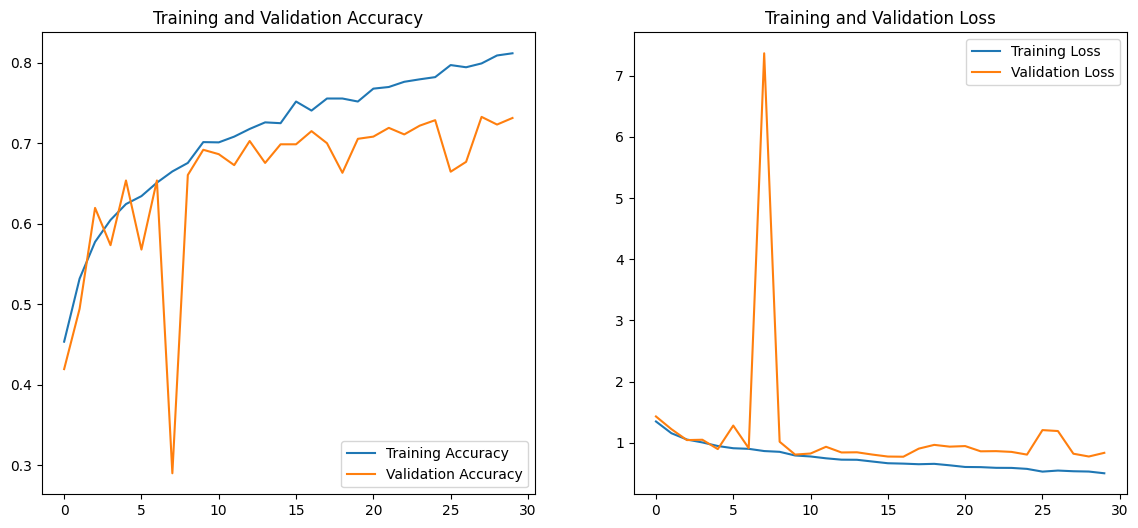

In [50]:
acc = hist_all.history['accuracy']
val_acc = hist_all.history['val_accuracy']

loss = hist_all.history['loss']
val_loss = hist_all.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

We can see a clear outlier on epoch 7. This model as more variance, like the previous one, probably because of batch normalization. However, we can see that it was harder for it to start overfitting. The validation accuracy has almost the same slope of the training accuracy.

## Problem 2
Implement an autoencoder to learn to encode images from the dataset given in the image classification
tutorial, based on the reference model used in the previous exercise.

In [6]:
#smaller image because of memory issues (2GB on graphic card)
img_height = 64
img_width = 64

In [7]:
class Autoencoder(keras.Model):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim   
        self.encoder = tf.keras.Sequential([
            #layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
            layers.Flatten(),
            layers.Dense(latent_dim, activation='relu'),
        ])
        self.decoder = tf.keras.Sequential([
          layers.Dense(img_height * img_width * 3, activation='sigmoid'),
          layers.Reshape((img_height, img_width, 3))
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [8]:
img_width*img_height

4096

In [9]:
170/3670

0.04632152588555858

In [10]:
batch_size = 16
train_ds, val_ds = get_dataset(
    img_width=img_width,
    img_height=img_height,
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Using 734 files for validation.


In [11]:
train_ds = train_ds.map(lambda x, y: (x/255,x/255))

In [12]:
val_ds = val_ds.map(lambda x, y: (x/255,x/255))

### 1. Train an autoencoder on 3500 images from the image classification dataset, leaving 170 aside for validation.

With a latent dimension of 2048, we reduce the dimension to $0.5$ the original size.

In [13]:
latent_dim = 2048
autoencoder = Autoencoder(latent_dim)
autoencoder.compile(optimizer='adam', loss="mse")

In [14]:
epochs = 30
autoencoder.fit(train_ds, epochs=epochs, validation_data=val_ds)

Epoch 1/30
184/184 [==============================] - 8s 31ms/step - loss: 0.0606 - val_loss: 0.0513
Epoch 2/30
184/184 [==============================] - 5s 29ms/step - loss: 0.0487 - val_loss: 0.0460
Epoch 3/30
184/184 [==============================] - 5s 29ms/step - loss: 0.0451 - val_loss: 0.0451
Epoch 4/30
184/184 [==============================] - 6s 30ms/step - loss: 0.0419 - val_loss: 0.0428
Epoch 5/30
184/184 [==============================] - 5s 29ms/step - loss: 0.0403 - val_loss: 0.0422
Epoch 6/30
184/184 [==============================] - 5s 29ms/step - loss: 0.0390 - val_loss: 0.0408
Epoch 7/30
184/184 [==============================] - 5s 29ms/step - loss: 0.0380 - val_loss: 0.0416
Epoch 8/30
184/184 [==============================] - 5s 29ms/step - loss: 0.0365 - val_loss: 0.0395
Epoch 9/30
184/184 [==============================] - 5s 29ms/step - loss: 0.0352 - val_loss: 0.0390
Epoch 10/30
184/184 [==============================] - 5s 29ms/step - loss: 0.0344 - val_lo

In [17]:
autoencoder.save_weights("autoencoder_weights", save_format="tf")

In [ ]:
autoencoder.load_weights("autoencoder_weights")

### 2. Sample 3 examples from each dataset split, the train and validation set, and use the autoencoder to encode and decode the images, comparing them with the original.

In [15]:
from random import choices, seed
seed(13)

In [16]:
train_selected = choices(range(3500), k=3)
val_selected = choices(range(170), k=3)

In [17]:
train_images, val_images = [], []
for idx in train_selected:
    batch_idx = int(idx/batch_size)
    image_idx = idx%batch_size
    
    train_images.append( 
        list(train_ds.as_numpy_iterator())[batch_idx][0][image_idx]
    )
    
for idx in val_selected:
    batch_idx = int(idx/batch_size)
    image_idx = idx%batch_size
    
    val_images.append( 
        list(val_ds.as_numpy_iterator())[batch_idx][0][image_idx]
    )

1/1 [==============================] - 0s 22ms/step


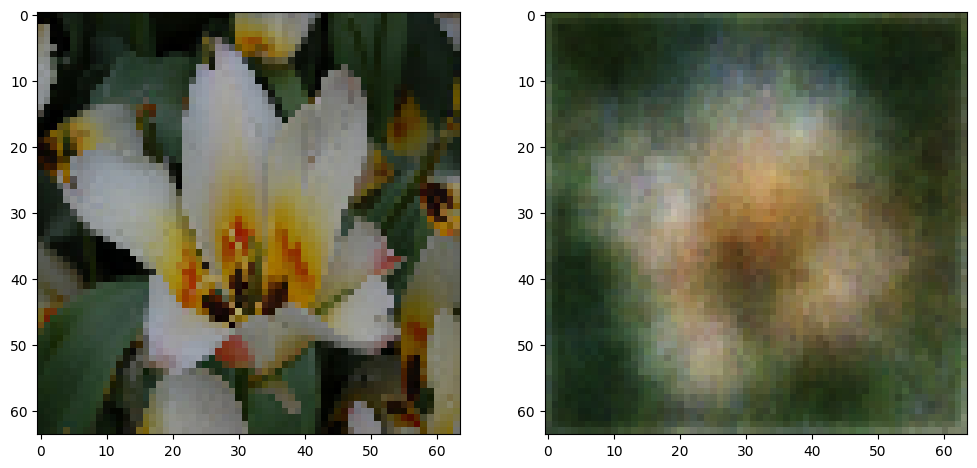

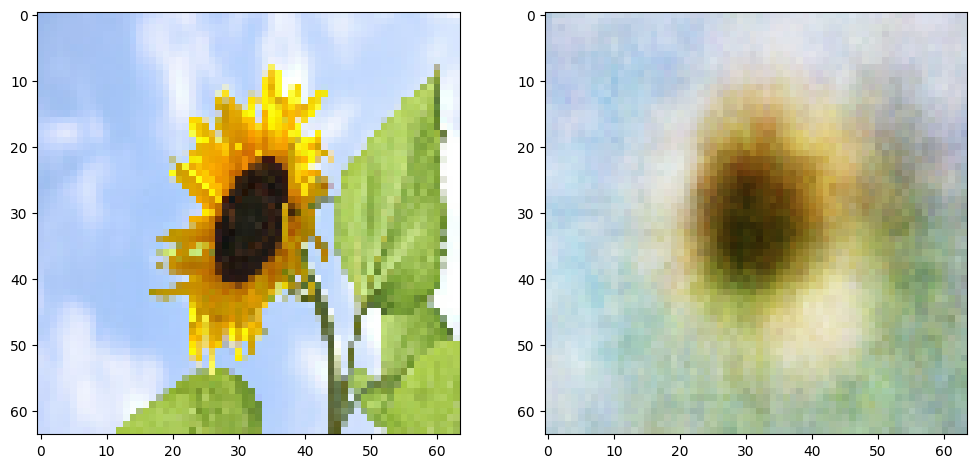

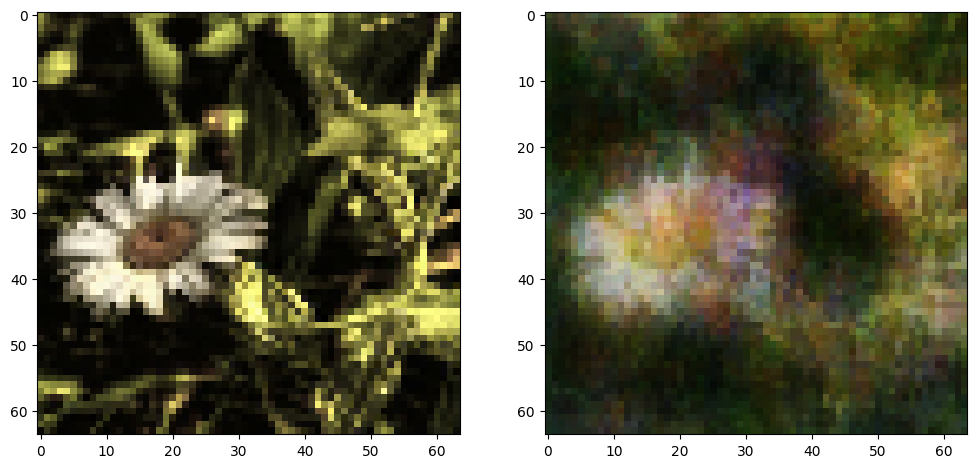

In [18]:
for image in train_images:
    im_decoded = autoencoder.predict(image.reshape(1, *image.shape)).reshape(image.shape)
    
    f, ax = plt.subplots(1,2, figsize=(12,6))
    
    ax[0].imshow(image)
    ax[1].imshow(im_decoded)

The model did not recover the image fully but captured the overall pattern of this images from the training set. With the original image in the left we can see the matching patterns. However, without it, only the simpler images have been captured by the model.


1/1 [==============================] - 0s 21ms/step


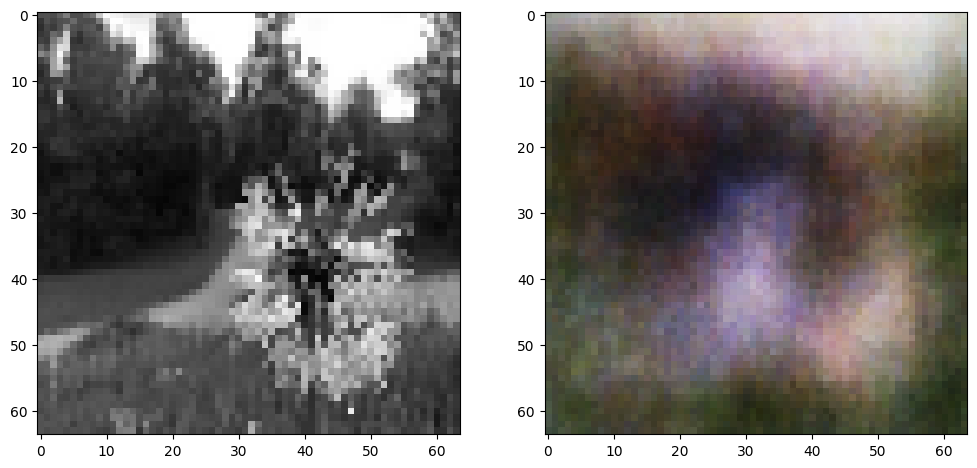

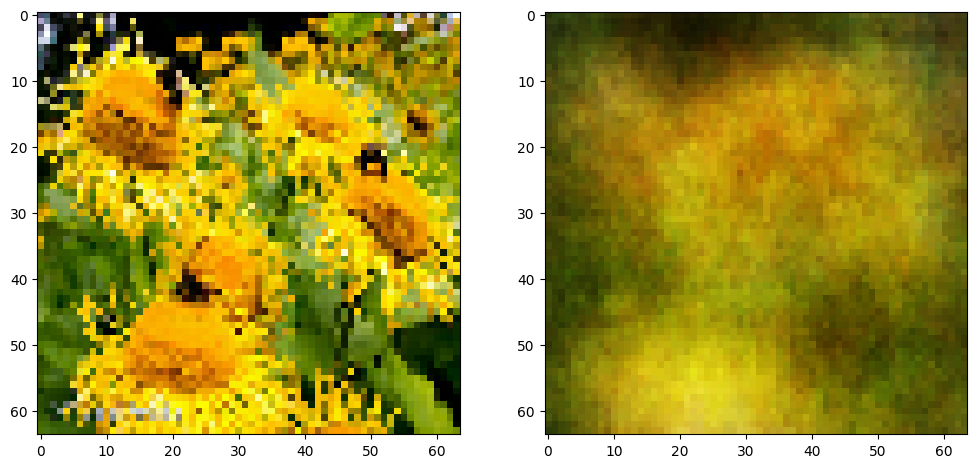

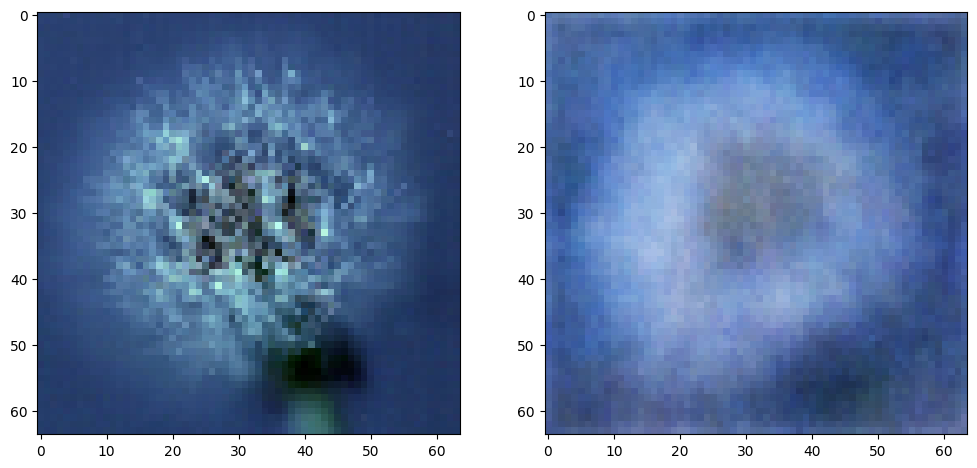

In [19]:
for image in val_images:
    im_decoded = autoencoder.predict(image.reshape(1, *image.shape)).reshape(image.shape)
    
    f, ax = plt.subplots(1,2, figsize=(12,6))
    
    ax[0].imshow(image)
    ax[1].imshow(im_decoded)

In the validation set we can see that the model could recover the general pattern for simple images that it had not previously seen. <br>
We can see that for the gray image, the autoencoder output is actually rgb, for example.

### 3. Sample 3 examples from each dataset split, the train and validation set, encoding the images using the Encoder, obtaining the intermediate representations. Using the GaussianNoise layer, introduce 5%, 10% and 20% noise to the representations. Finally, decode the repre-sentations using the Decoder and analyze the obtain

In [20]:
train_noise_idx = choices(range(3500), k=3)
val_noise_idx = choices(range(170), k=3)

In [22]:
noise_models = [Sequential([
    layers.GaussianNoise(stddev=i) 
]) for i in [0.05, 0.1, 0.2]]

In [28]:
for i in range(len(noise_models)):
    noise_models[i].compile()

In [29]:
train_images = []
val_images = []

for idx in train_noise_idx:
    batch_idx = int(idx/batch_size)
    image_idx = idx%batch_size
    
    train_images.append( 
        list(train_ds.as_numpy_iterator())[batch_idx][0][image_idx]
    )
    
for idx in val_noise_idx:
    batch_idx = int(idx/batch_size)
    image_idx = idx%batch_size
    
    val_images.append( 
        list(val_ds.as_numpy_iterator())[batch_idx][0][image_idx]
    )

In [30]:
train_encoded = [[] for i in range(3)]
val_encoded = [[] for i in range(3)]

for noise in noise_models:
    for i, image in enumerate(train_images):
        encoded = autoencoder.encoder.predict( image.reshape(1, *image.shape) )
        train_encoded[i].append(noise(encoded, training=True))
        
for noise in noise_models:
    for i, image in enumerate(val_images):
        encoded = autoencoder.encoder.predict( image.reshape(1, *image.shape) )
        val_encoded[i].append(noise(encoded, training=True))


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 23ms/step


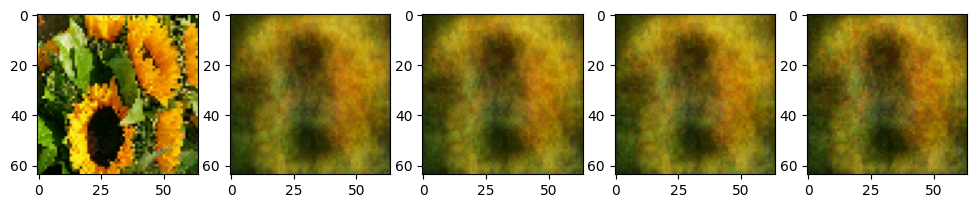

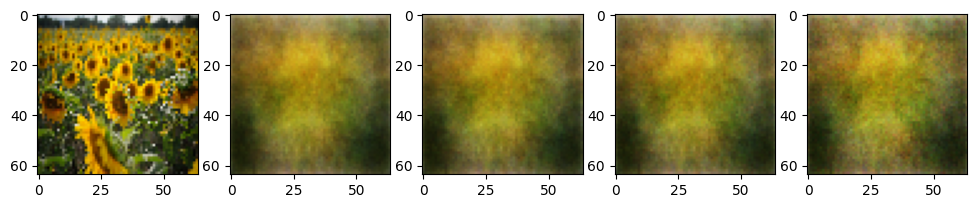

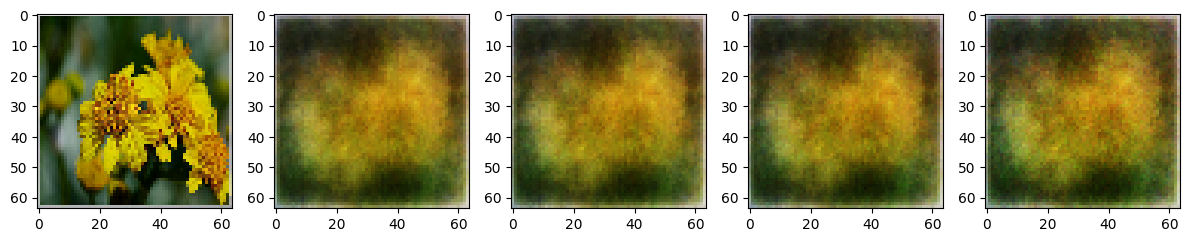

In [33]:
for i, images in enumerate(train_encoded):
    f, ax = plt.subplots(1,5, figsize=(12,6))
    
    ax[0].imshow(train_images[i])
    
    predicted_no_noise = autoencoder.predict(
        train_images[i].reshape(1, *train_images[i].shape)
    )
    predicted_no_noise = predicted_no_noise.reshape(
        predicted_no_noise.shape[1:]
    )
    
    ax[1].imshow(predicted_no_noise)
    for idx, image in enumerate(images, start=2):
        im_decoded = autoencoder.decoder.predict(image).reshape(img_width, img_height, 3)
        ax[idx].imshow(im_decoded)
f.tight_layout()

1/1 [==============================] - 0s 22ms/step


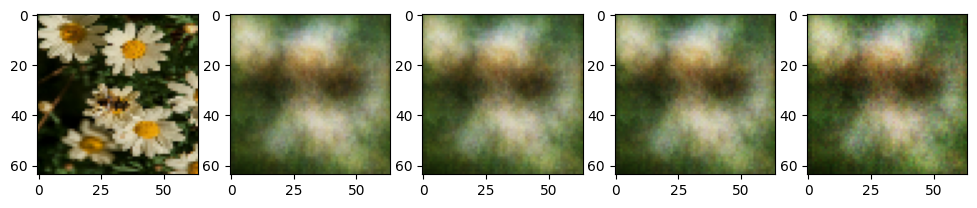

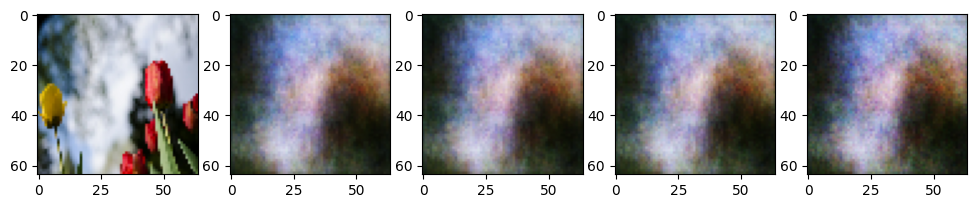

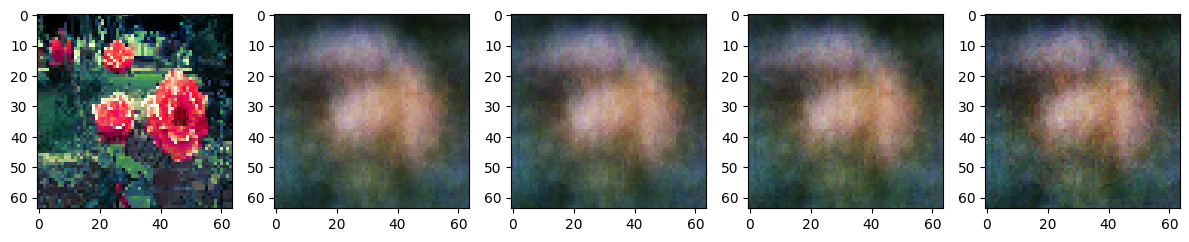

In [34]:
for i, images in enumerate(val_encoded):
    f, ax = plt.subplots(1,5, figsize=(12,6))
    
    ax[0].imshow(val_images[i])
    predicted_no_noise = autoencoder.predict(
        val_images[i].reshape(1, *val_images[i].shape)
    )
    
    predicted_no_noise = predicted_no_noise.reshape(
        predicted_no_noise.shape[1:]
    )
    ax[1].imshow(predicted_no_noise)
    for idx, image in enumerate(images, start=2):
        im_decoded = autoencoder.decoder.predict(image).reshape(img_width, img_height, 3)
        ax[idx].imshow(im_decoded)
f.tight_layout()

We can't see evident changes in the reconstruction of the image as the noise increases. The model is robust to the introduction of noise in latent dimension of the images for both the seen and the unseen images.

### 4. Sample 3 examples from each dataset split, the train and validation set, and introduce 5%, 10% and 20% noise (GaussianNoise Layer) to the image pixels (input level). Run the autoencoder with these inputs and analyze the obtain

In [35]:
train_noise_idx = choices(range(3500), k=3)
val_noise_idx = choices(range(170), k=3)

In [36]:
noise_models = [Sequential([
    layers.GaussianNoise(stddev=i) 
]) for i in [0.05, 0.1, 0.2]]

In [37]:
for i in range(len(noise_models)):
    noise_models[i].compile()

In [38]:
train_images = []
val_images = []

for idx in train_noise_idx:
    batch_idx = int(idx/batch_size)
    image_idx = idx%batch_size
    
    train_images.append( 
        list(train_ds.as_numpy_iterator())[batch_idx][0][image_idx]
    )
    
for idx in val_noise_idx:
    batch_idx = int(idx/batch_size)
    image_idx = idx%batch_size
    
    val_images.append( 
        list(val_ds.as_numpy_iterator())[batch_idx][0][image_idx]
    )

In [39]:
train_noisy = [[] for i in range(3)]
val_noisy = [[] for i in range(3)]

for noise in noise_models:
    for i, image in enumerate(train_images):
        train_noisy[i].append(np.array(noise(image, training=True)))
        
for noise in noise_models:
    for i, image in enumerate(val_images):
        val_noisy[i].append(np.array(noise(image, training=True)))


In [42]:
np.all(train_noisy[0][1]==train_noisy[0][2])

False

1/1 [==============================] - 0s 23ms/step


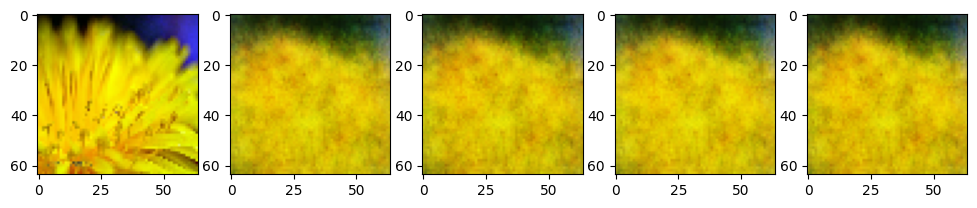

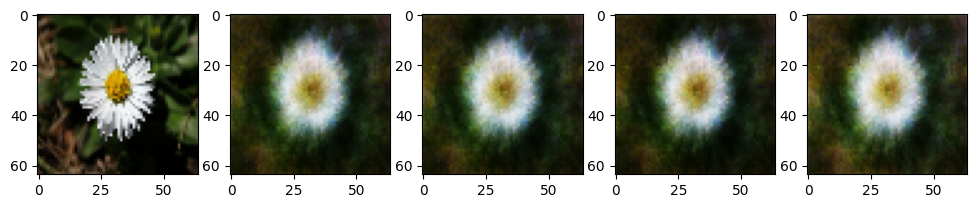

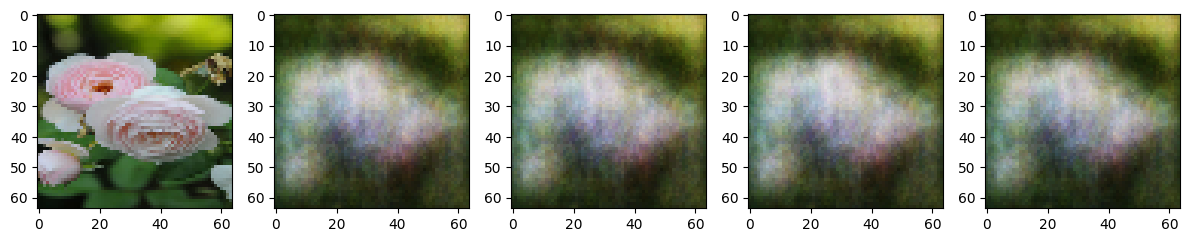

In [40]:
for i, images in enumerate(train_noisy):
    f, ax = plt.subplots(1,5, figsize=(12,6))
    
    ax[0].imshow(train_images[i])
    predicted_no_noise = autoencoder.predict(
        train_images[i].reshape(1, *train_images[i].shape)
    )
    predicted_no_noise = predicted_no_noise.reshape(
        predicted_no_noise.shape[1:]
    )
    ax[1].imshow(predicted_no_noise)
    for idx, image in enumerate(images, start=2):
        im_prime = autoencoder.predict(
            image.reshape(
                (1, *image.shape)
            )
        ).reshape(img_width, img_height, 3)
        ax[idx].imshow(im_prime)
f.tight_layout()

1/1 [==============================] - 0s 23ms/step


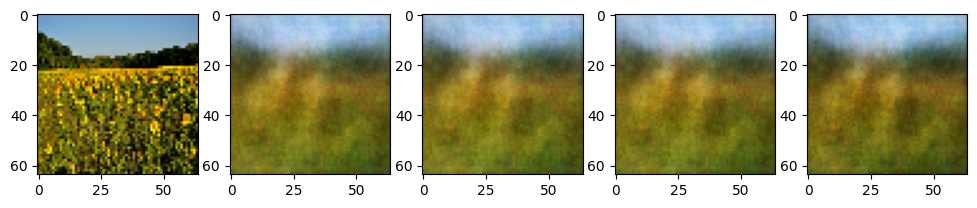

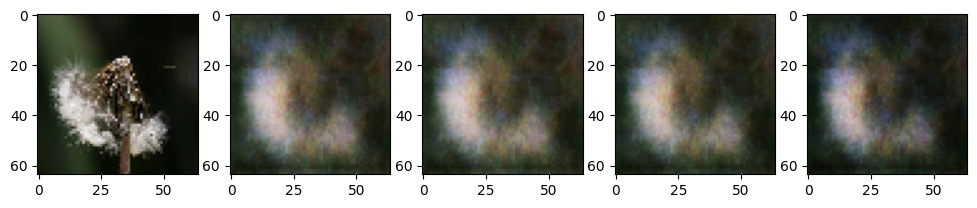

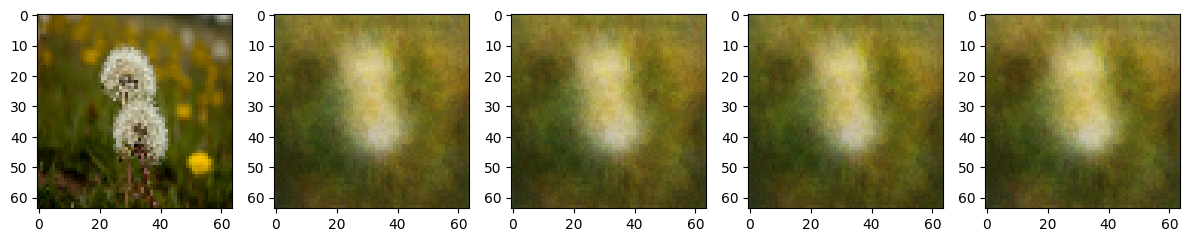

In [41]:
for i, images in enumerate(val_noisy):
    f, ax = plt.subplots(1,5, figsize=(12,6))
    
    ax[0].imshow(val_images[i])
    predicted_no_noise = autoencoder.predict(
        val_images[i].reshape(1, *val_images[i].shape)
    )
    predicted_no_noise = predicted_no_noise.reshape(
        predicted_no_noise.shape[1:]
    )
    ax[1].imshow(predicted_no_noise)
    for idx, image in enumerate(images, start=2):
        im_prime = autoencoder.predict(
            image.reshape(
                (1, *image.shape)
            )
        ).reshape(img_width, img_height, 3)
        ax[idx].imshow(im_prime)
f.tight_layout()

Likewise, there are no evident downgrades on the reconstructed image as the noise is increased. The model is also robust to the introduction of noise in the input sample for both seen and unseen images.